In [1]:
import math
import numpy as np

In [2]:
a = 0
mean = [1,2]
cov_matrix = [[1,a],[a,1]]

In [3]:
#Initially generate numbers x1 and x2 randomly

x1 = np.random.normal(mean[0],cov_matrix[0][0])
x2 = np.random.normal(mean[1],cov_matrix[1][1])

In [4]:
# updating mean and covariance matrix every iteration to get new sample

def gibbs_sampler(mean, cov_matrix, a, x, t):
    index = t%2
    mean_y = mean[index]
    mean_x = mean[index-1]
    
    var_y = cov_matrix[index][index]
    var_x = cov_matrix[index-1][index-1]
    
    rho = a/(cov_matrix[0][0]*cov_matrix[1][1])
    new_mean = mean_y + rho*(var_y/var_x)*(x - mean_x)
    
    new_var = var_y*math.sqrt(1-rho**2)
    
    return np.random.normal(new_mean,new_var)

In [5]:
x1_arr = np.array([x1])
x2_arr = np.array([x2])

# alternatively sampling x1 and x2

for t in range(10000):
    if t%2 == 0:
        x1 = gibbs_sampler(mean, cov_matrix, a, x2, t)
        x1_arr = np.append(x1_arr,x1)
        x1_arr = np.append(x1_arr,x1)
    else:
        x2 = gibbs_sampler(mean, cov_matrix, a, x1, t)
        x2_arr = np.append(x2_arr,x2)
        x2_arr = np.append(x2_arr,x2)

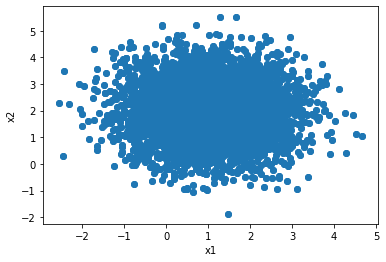

In [9]:
import matplotlib.pyplot as plt

plt.scatter(x1_arr, x2_arr)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [10]:
# Estimated mean of x1
np.mean(x1_arr)

1.0002745638783286

In [11]:
# Estimated mean of x2
np.mean(x2_arr)

2.007913691988471

In [12]:
# Estimated Covariance matrix
r=np.corrcoef(x1_arr,x2_arr)
print(r)

[[ 1.         -0.00816588]
 [-0.00816588  1.        ]]


In [13]:
time_arr = list(range(0,10001))
time_arr[-1]

10000

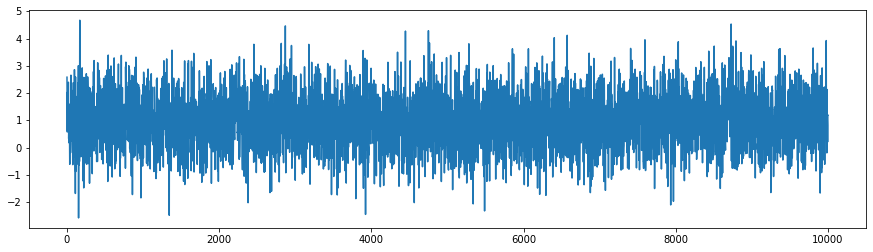

In [14]:

plt.figure(figsize=(15, 4))
display(plt.plot(time_arr, x1_arr))

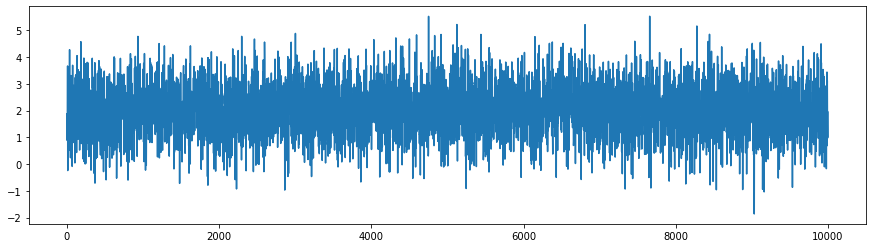

In [15]:
plt.figure(figsize=(15, 4))
display(plt.plot(time_arr, x2_arr))